In this notebook we will look at the overlap in query results investigating genes that correspond to an intuitive notion of 'cell suface receptor'

In [1]:
## Create a GO ontology object
from ontobio.ontol_factory import OntologyFactory
ofa = OntologyFactory()
ont = ofa.create('go')

/Users/cjm/repos/go-notebooks/venv/lib/python3.6/site-packages/cachier/mongo_core.py:24: UserWarning: Cachier warning: pymongo was not found. MongoDB cores will not work.
  "Cachier warning: pymongo was not found. MongoDB cores will not work.")


In [29]:
## This value can be altered - we will look at mouse genes to begin with
taxon = 'NCBITaxon:10090'

## We will explore the overlap between 3 queries.
## Two are simple single-term queries, the last is
## an intersection query
m = {
    'external side of plasma membrane': ['GO:0009897'],
    'plasma membrane receptor complex': ['GO:0098802'],
    'plasma membrane AND receptor activity': ['GO:0005886', 'GO:0004872']
}

# print links to amigo pages for each term,
# this is just to allow the person viewing the notebook to explore
# further on their own
for n,cs in m.items():
    print("{} {}".format(n,cs))
    for c in cs:
        print("    http://amigo.geneontology.org/amigo/term/{}".format(c))

external side of plasma membrane ['GO:0009897']
    http://amigo.geneontology.org/amigo/term/GO:0009897
plasma membrane receptor complex ['GO:0098802']
    http://amigo.geneontology.org/amigo/term/GO:0098802
plasma membrane AND receptor activity ['GO:0005886', 'GO:0004872']
    http://amigo.geneontology.org/amigo/term/GO:0005886
    http://amigo.geneontology.org/amigo/term/GO:0004872


In [5]:
## Fetch GO associations for taxon of interest
from ontobio.assoc_factory import AssociationSetFactory
afactory = AssociationSetFactory()
aset = afactory.create(ontology=ont, subject_category='gene', object_category='function', taxon=taxon)

In [30]:
## create list of sets and their labels for the venn diagram
sets = []
setlabels = []
for n,cs in m.items():
    genes = aset.query(cs)
    sets.append(set(genes))
    setlabels.append(n)
    

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_venn import venn3, venn2


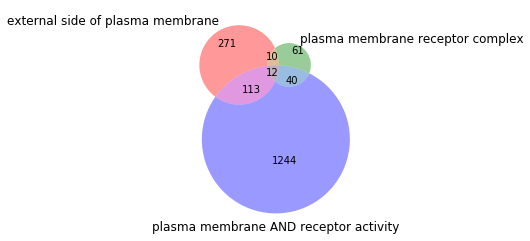

In [31]:
## Technically an Euler diagram...
venn3(sets, tuple(setlabels))